# Water potability
Based on the [Kaggle Challenge Drinking_Water_Potability](https://www.kaggle.com/artimule/drinking-water-probability)

**Context**
Access to safe drinking water is essential to health, a basic human right, and a component of effective policy for health protection. This is important as a health and development issue at a national, regional, and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Content**
The drinking_water_potability.csv file contains water quality metrics for 3276 different water bodies.

## 0. Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Numpy arrays are used to store training and test data.
import numpy as np

# Pandas is used to manipulate tabular data.
import pandas as pd

# Matplotlib is used to plot graphs.
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998).
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Convenience function to create display a progress bar.
# Source : https://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console
def print_progress_bar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()
 
# Saves a figure to a file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./figs", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1. EDA

In [2]:
data = pd.read_csv('drinking_water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Sulfate,781,23.8
ph,491,15.0
Trihalomethanes,162,4.9
Potability,0,0.0
Turbidity,0,0.0
Organic_carbon,0,0.0
Conductivity,0,0.0
Chloramines,0,0.0
Solids,0,0.0
Hardness,0,0.0


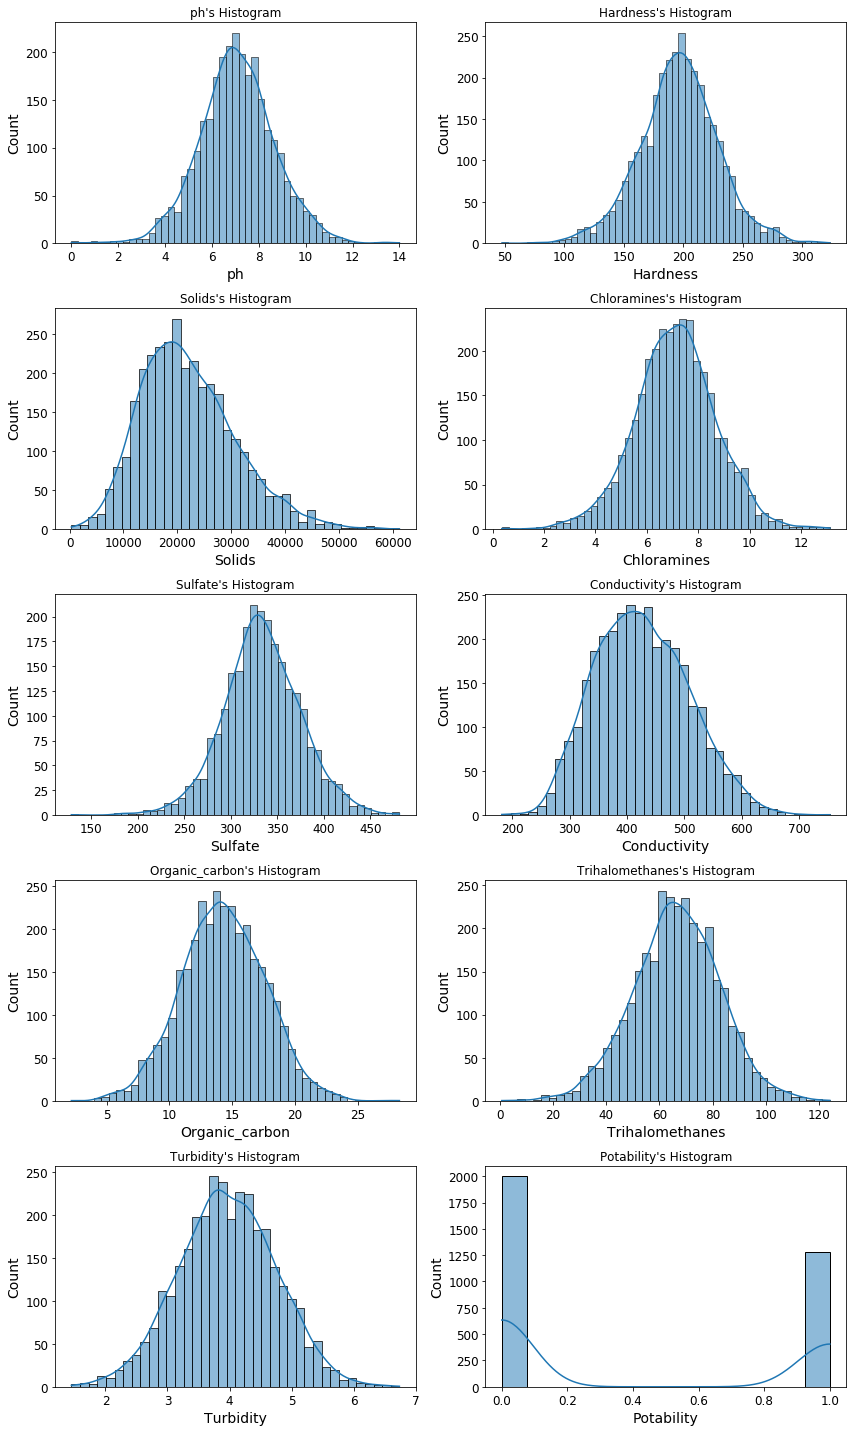

In [5]:
import seaborn as sns
plt.figure(figsize=(12,20))

for n, column in enumerate(data.columns):
    plt.subplot(5, 2, n+1)
    sns.histplot(data[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"{column}'s Histogram")

plt.tight_layout()
plt.show()

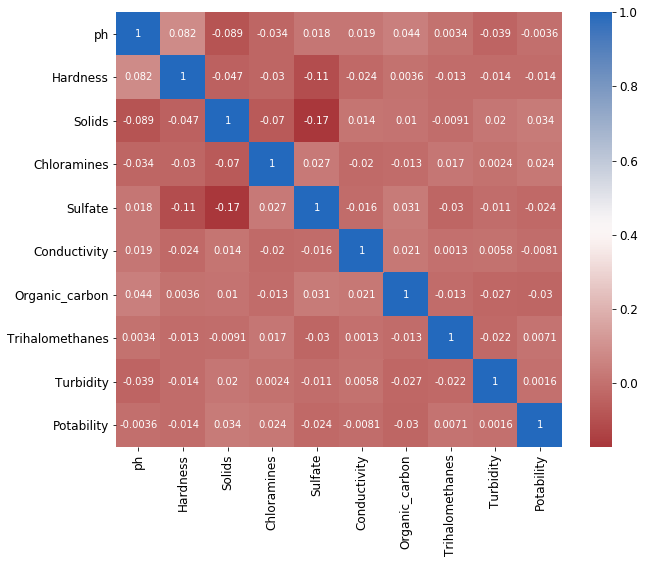

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, cmap="vlag_r")

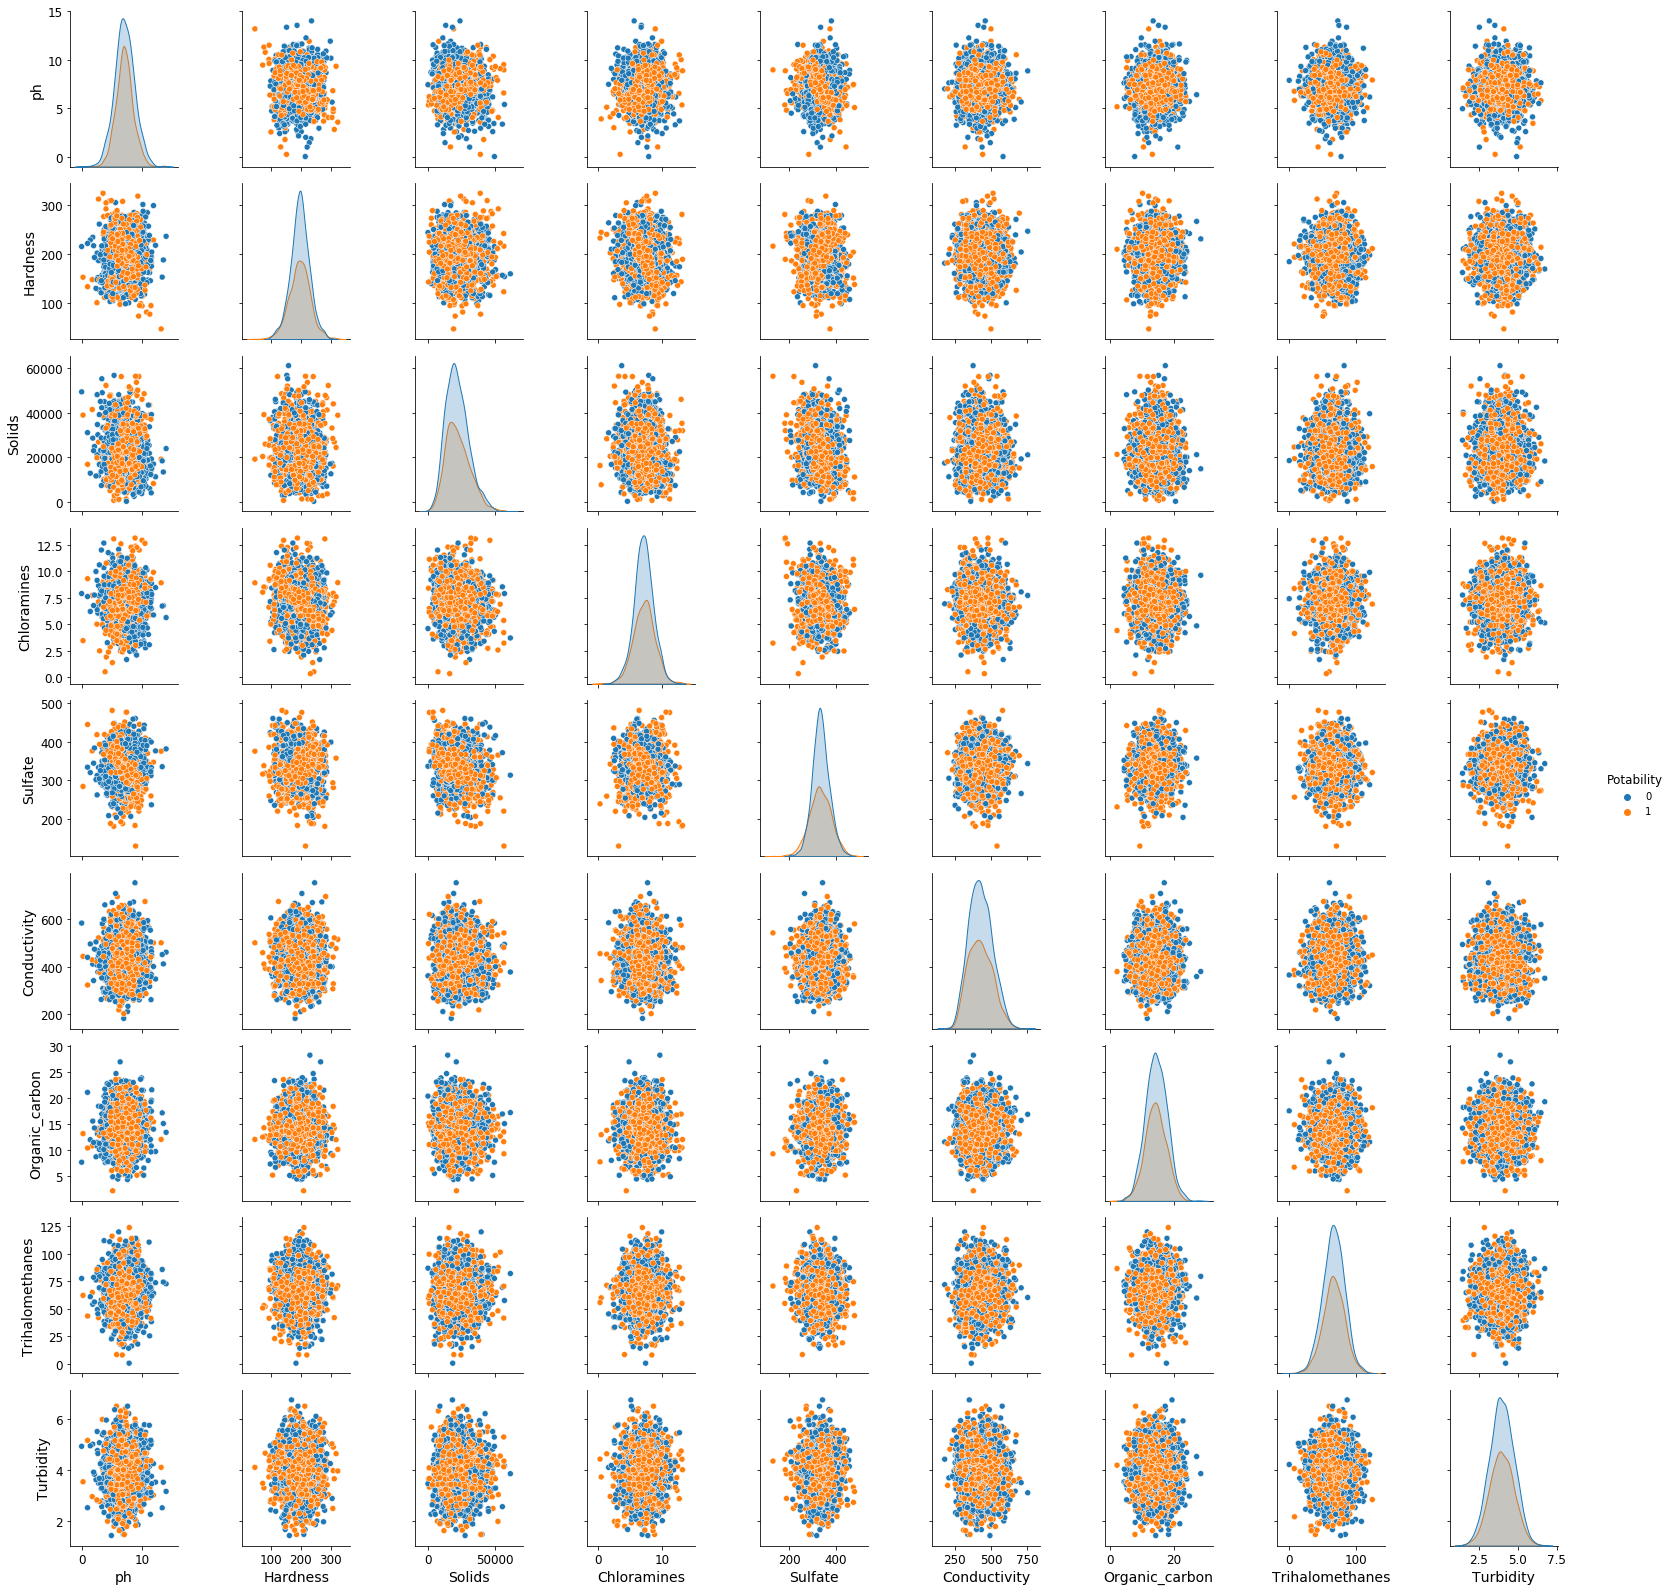

In [13]:
sns.pairplot(data=data,hue='Potability')

## 2. Feature Engineering

#### 2.1 Univariate feature imputation

In [60]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

y = data.Potability
X = data.drop(["Potability"],axis=1)

imp_mean = SimpleImputer(strategy='mean')
X_mean = imp_mean.fit_transform(X)

scaler = StandardScaler()
# We scale the training instances.
X_scaled = scaler.fit_transform(X_mean)

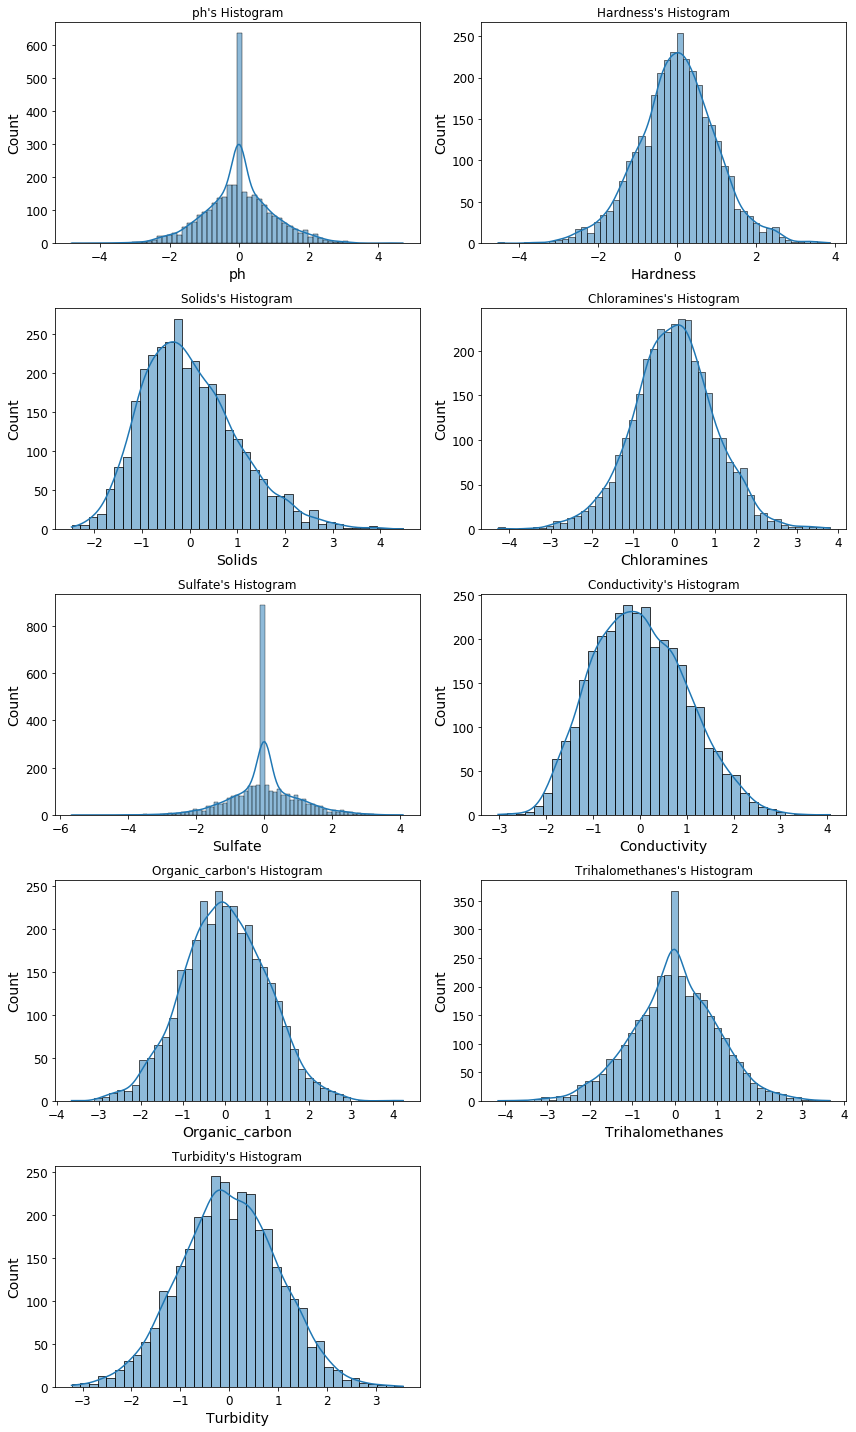

In [8]:
import seaborn as sns
plt.figure(figsize=(12,20))

data_processed = pd.DataFrame(X_scaled,columns=X.columns)

for n, column in enumerate(data_processed.columns):
    plt.subplot(5, 2, n+1)
    sns.histplot(data_processed[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"{column}'s Histogram")

plt.tight_layout()
plt.show()

#### 2.2  Multivariate feature imputation

In [20]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

X = data.drop(["Potability"],axis=1)

it_imp = IterativeImputer(random_state=0)
X_it_imp = it_imp.fit_transform(X)

#plt.plot(X_it_imp[~missing_idx, 0], y[~missing_idx], '.', color='b', label="Observed values")
#plt.plot(X_it_imp[missing_idx, 0], y[missing_idx], '.', color='r', label="Imputed values")
#plt.xlabel('Explanatory variable (X)');
#plt.ylabel('Dependent variable (y)')

#plt.legend()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_it_imp)

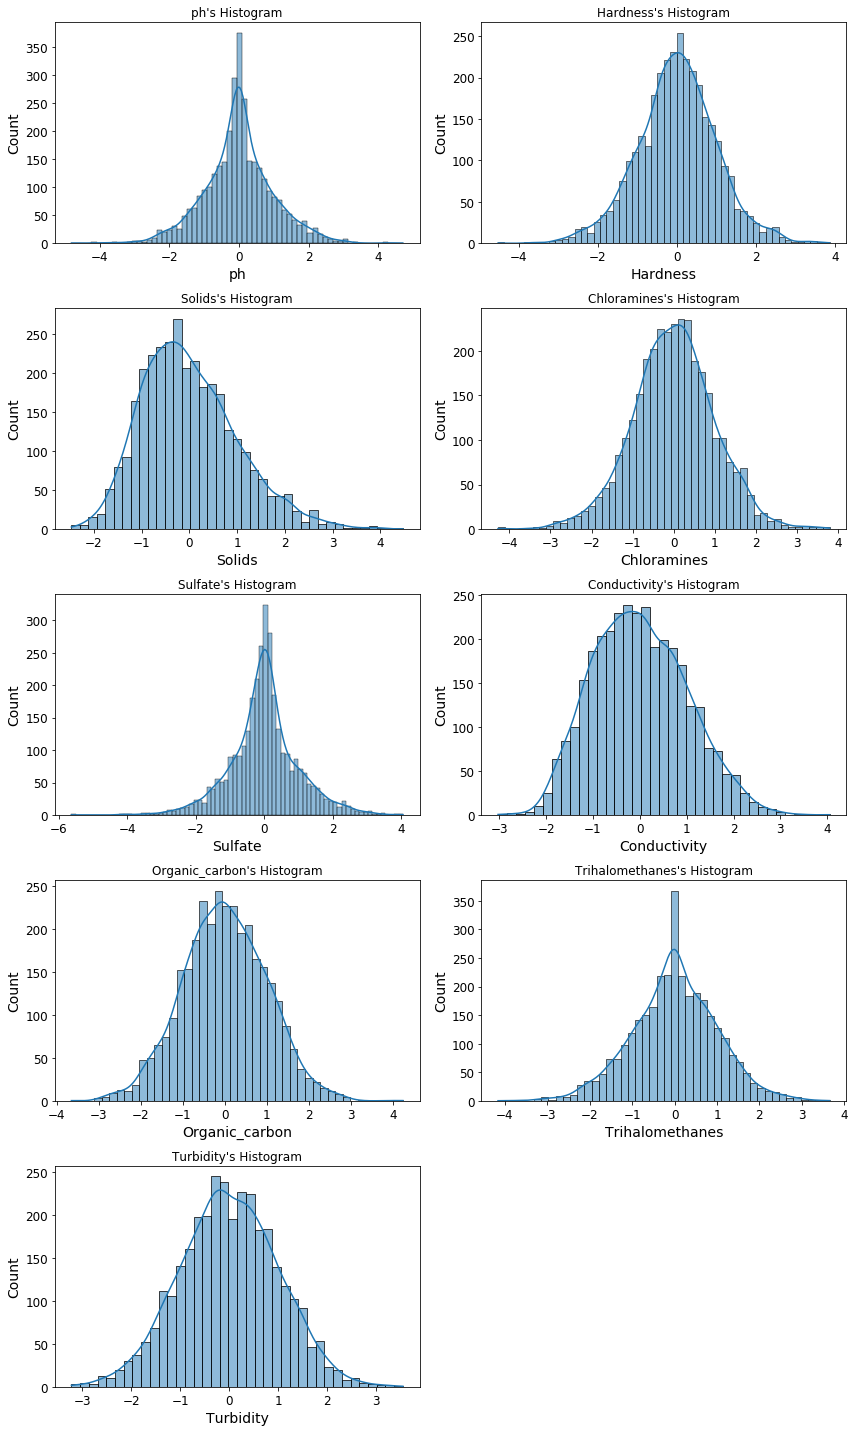

In [21]:
import seaborn as sns
plt.figure(figsize=(12,20))

data_processed = pd.DataFrame(X_scaled,columns=X.columns)

for n, column in enumerate(data_processed.columns):
    plt.subplot(5, 2, n+1)
    sns.histplot(data_processed[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"{column}'s Histogram")

plt.tight_layout()
plt.show()

## 3. Modeling

In [62]:
#Choosing the feature engineering pipeline
feature_engineering = 'mutlivariate_min_max'

pipelines = {'univariate' : Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler()),]),
             'mutlivariate' : Pipeline([
    ('it_imputer', IterativeImputer()),
    ('std_scaler', StandardScaler()),]),
            'mutlivariate_min_max' : Pipeline([
    ('it_imputer', IterativeImputer()),
    ('min_max_scaler', MinMaxScaler()),])
            }

used_pipeline = pipelines[feature_engineering]

X_scaled = used_pipeline.fit_transform(data.drop(["Potability"],axis=1))

data_processed = pd.DataFrame(X_scaled,columns=X.columns)
data_processed

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.513633,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.613118,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.576603,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327
...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534
3272,0.557775,0.530016,0.279263,0.603473,0.595437,0.368912,0.678284,0.533311,0.254915
3273,0.672822,0.465486,0.539101,0.547807,0.562022,0.438152,0.338662,0.560655,0.349570
3274,0.366197,0.664407,0.191490,0.465860,0.590840,0.387157,0.343638,0.622659,0.616120


### 3.1 Decision tree and Ensemble methods

#### 3.1.1 Bagging

22it [09:40, 26.38s/it]


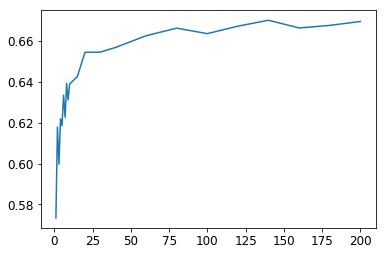

In [10]:
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

from tqdm import tqdm

y = data.Potability
X = data_processed

n_estimator_list = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,60,80,100,120,140,160,180,200]
accuracy = np.zeros(len(n_estimator_list))
N=25

for i,n_estimators in tqdm(enumerate(n_estimator_list)):
    acc = np.zeros(N)
    for j in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
        clf = BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators=n_estimators)
        clf.fit(X_train, y_train)
        Z = clf.predict(X_test)
        acc[j]=clf.score(X_test,y_test)
    accuracy[i] = acc.mean()

plt.plot(n_estimator_list,accuracy)

#### 3.1.2 Random Forest

22it [04:03, 11.05s/it]


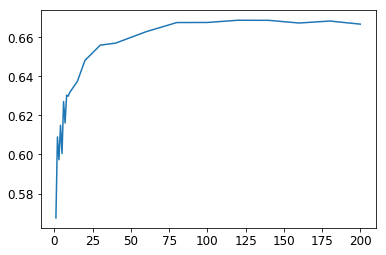

In [24]:
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

y = data.Potability
X = data_processed

n_estimator_list = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,60,80,100,120,140,160,180,200]
accuracy = np.zeros(len(n_estimator_list))
N=25

for i,n_estimators in tqdm(enumerate(n_estimator_list)):
    acc = np.zeros(N)
    for j in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
        clf = RandomForestClassifier(n_estimators=n_estimators)
        clf.fit(X_train, y_train)
        Z = clf.predict(X_test)
        acc[j]=clf.score(X_test,y_test)
    accuracy[i] = acc.mean()

plt.plot(n_estimator_list,accuracy)

#### 3.1.3 XGBoost
[Read documentation](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier)

22it [02:40,  7.27s/it]


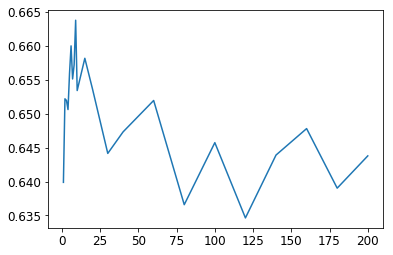

In [65]:
%matplotlib inline 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

y = data.Potability
X = data_processed

n_estimator_list = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,60,80,100,120,140,160,180,200]
accuracy = np.zeros(len(n_estimator_list))
N=25

for i,n_estimators in tqdm(enumerate(n_estimator_list)):
    acc = np.zeros(N)
    for j in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10)
        scale_pos_weight = (len(y_train) - sum(y_train))/sum(y_train)
        clf = XGBClassifier(n_estimators=n_estimators,
                            #scale_pos_weight=scale_pos_weight,
                            use_label_encoder=False,
                            objective='binary:logistic',
                            eval_metric='logloss')
        clf.fit(X_train, y_train)
        Z = clf.predict(X_test)
        acc[j]=clf.score(X_test,y_test)
    accuracy[i] = acc.mean()

plt.plot(n_estimator_list,accuracy)

#### 3.1.4 ExtraTree

### 3.2 K-NN

### 3.3 Logistic Regression

### 3.4 SVM

#### 3.4.1 Linear Kernel

#### 3.4.2 RBF Kernel

### 3.5 Naives Bayesian

## 4. Evaluation

Confusion Matrix | ROC AUC | F1_Score | Accuracy

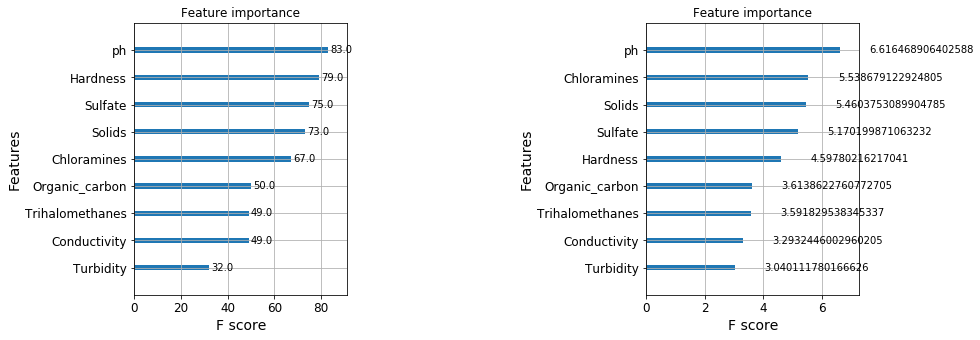

In [70]:
import xgboost as xgb 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10)
model = XGBClassifier(n_estimators=20,
                        use_label_encoder=False,
                        objective='binary:logistic',
                        eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,5))
xgb.plot_importance(model, max_num_features=20, importance_type='weight', ax=ax1)
ax2.axis('off')
xgb.plot_importance(model, max_num_features=20, importance_type='gain', ax=ax3)

[SHAP values - documentation](https://github.com/slundberg/shap)

In [71]:
import shap
sample_data = X_train[model.get_booster().feature_names]

explainer = shap.TreeExplainer(model,data=X_train[model.get_booster().feature_names],model_output="probability")

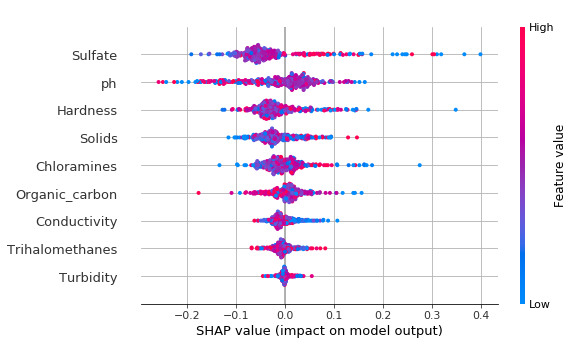

In [72]:
import matplotlib.pyplot as pl
pl.grid(b=None)

sample_shap = X_test[model.get_booster().feature_names]
shap_values = explainer.shap_values(sample_shap)

shap.summary_plot(shap_values, sample_shap)

models_acc = []

models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]

for model in models:
    ''' fit on data '''
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    ''' appending result to model_acc'''
    models_acc.append(accuracy_score(y_test, pred))

res = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC']
})
